In [1]:
import g3lhalo
import pyccl as ccl
import matplotlib.pyplot as plt
import numpy as np

# Example for Correlation functions
We show here how to compute correlation functions with the halo model

## Defining the model
See `exampleHalomodelIngredients.ipynb` for details


In [2]:
# Cosmology
cosmo = {
    'Om_c': 0.3156,
    'Om_b': 0.0492,
    'h': 0.6727,
    'sigma_8': 0.831,
    'n_s': 0.9645
}

# Halo mass function
hmf=ccl.halos.MassFuncSheth99()

# Halo bias
hbf=ccl.halos.HaloBiasSheth01()

# Concentration mass Relation
cmfunc=ccl.halos.ConcentrationDuffy08()


# HOD
# HOD parameters
alpha=1
sigma=0.2
Mth=1e12
Mprime=20*Mth
beta=1

# Correlation between galaxy populations
A=0 # 0 ==> No correlation between populations
epsilon=0

# Scaling of halo profile concentration
flens=1 # 1 ==> Same as dark matter

# Get HOD
hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)

# Define model
model = g3lhalo.halomodel(verbose=True, cosmo=cosmo, hmfunc=hmf, hbfunc=hbf, cmfunc=cmfunc)
model.set_hods(hod_cen, hod_sat, A=A, epsilon=epsilon, flens1=flens, flens2=flens)




Setting cosmology
Om_c: 0.3156
Om_b: 0.0492
h: 0.6727
sigma_8: 0.831
n_s: 0.9645
Also setting linear matter power spectrum
Setting halo mass function
Setting halo bias function
Setting concentration mass relation


## Defining source and lens redshift distributions

We define here a lens and source $n(z)$, which are both Gaussian centered on two different redshifts

In [3]:
zs=np.linspace(0.2, 1.5)

n_sources=np.exp(-(zs-1)**2/0.2**2)
n_lenses=np.exp(-(zs-0.5)**2/0.2**2)

n_sources/=(np.sum(n_sources)*(zs[1]-zs[0]))
n_lenses/=(np.sum(n_lenses)*(zs[1]-zs[0]))


Text(0, 0.5, '$n(z)$')

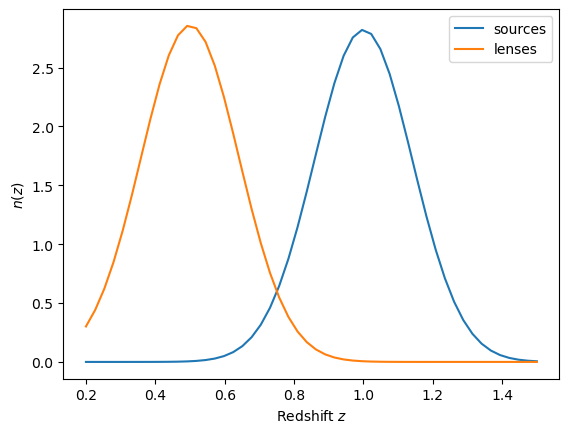

In [4]:

plt.plot(zs, n_sources, label="sources")

plt.plot(zs, n_lenses, label='lenses')


plt.legend()
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"$n(z)$")

## Defining `projectedSpectra` object

We initialize now the `projectedSpectra` object, which does the calculations

In [5]:
projection=g3lhalo.projectedSpectra(model)

projection.set_nz_lenses(zs, n_lenses)
projection.set_nz_sources(zs, n_sources)

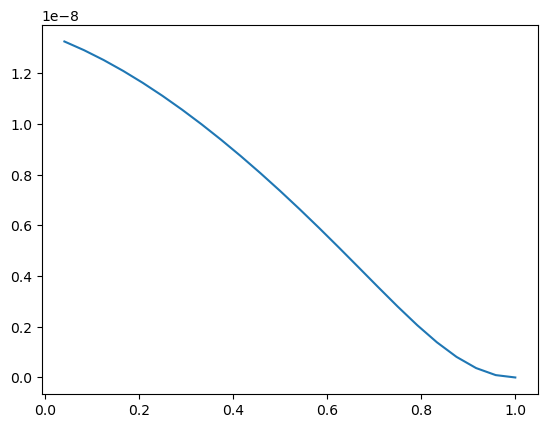

In [6]:
plt.plot(projection.zs, projection.gs)

## Calculate Power spectra

In [9]:
ells=np.geomspace(2, 2000, 1998)

# convergence-convergence
C_kk_1h, C_kk_2h, C_kk=projection.C_kk(ells)

# convergence-galaxies
C_kg_1h, C_kg_2h, C_kg=projection.C_kg(ells, 1)

# galaxies-galaxies
C_gg_1h, C_gg_2h, C_gg=projection.C_gg(ells, 1, 1)

In [11]:
cosmo

{'Om_c': 0.3156, 'Om_b': 0.0492, 'h': 0.6727, 'sigma_8': 0.831, 'n_s': 0.9645}

## Calculate correlation functions

In [21]:
theta_deg = np.geomspace(0.1, 3, 20) # Theta is in degrees
cosmo_ccl = ccl.Cosmology(
    Omega_c = cosmo['Om_c'],
    Omega_b = cosmo['Om_b'],
    h = cosmo['h'],
    sigma8 = cosmo['sigma_8'],
    n_s = cosmo['n_s']
)


xi_plus = ccl.correlation(cosmo_ccl, ell=ells, C_ell=C_kk, theta=theta_deg, type='GG+')
xi_minus = ccl.correlation(cosmo_ccl, ell=ells, C_ell=C_kk, theta=theta_deg, type='GG-')

gamma_t = ccl.correlation(cosmo_ccl, ell=ells, C_ell=C_kg, theta=theta_deg, type='NG')

omega = ccl.correlation(cosmo_ccl, ell=ells, C_ell=C_gg, theta=theta_deg, type='NN')

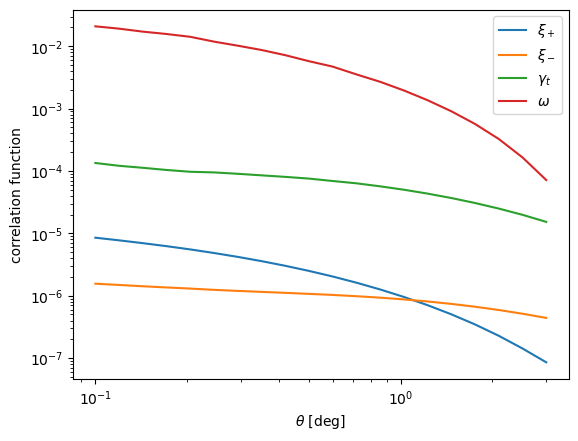

In [23]:
fig, axes=plt.subplots()

axes.loglog(theta_deg, xi_plus, label=r'$\xi_+$')
axes.loglog(theta_deg, xi_minus, label=r'$\xi_-$')
axes.loglog(theta_deg, gamma_t, label=r'$\gamma_t$')
axes.loglog(theta_deg, omega, label=r'$\omega$')

plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'correlation function')

axes.legend()